In [1]:
import sys
sys.path.append("../")
from PREDICT.PREDICT import PREDICT
from PREDICT.Models.EvaluatePredictions import EvaluatePredictions
from PREDICT.Metrics.Accuracy import Accuracy

import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Create some fake data

Create some fake data across 52 weeks with accuracy declining over time.

Start with accuracy = 90% and dropping linearly to 50% by the end of the year.

For each day, create 100 fake datapoints with that expected level of accuracy.

In [2]:
mydict = {
    'date': list(),
    'outcome': list(),
    'prediction': list()
}
numweeks = 52
startDate = pd.to_datetime('01-01-2024', dayfirst=True)
endDate = pd.to_datetime('31-12-2024', dayfirst=True)
numdays = (endDate - startDate).days
accuracy_start = 0.9
accuracy_end = 0.5
accuracy_drop = (0.9-0.5)/numdays

for i in range(numdays):
    curday = startDate + dt.timedelta(days=i)
    curaccuracy = accuracy_start - accuracy_drop*i
    # Generate fake outcomes
    curoutcomes = np.random.choice([0, 1], size=100, p=[0.5, 0.5])
    # Generate fake outcomes to match current accuracy level
    correct = np.random.choice([0, 1], size=100, p=[1-curaccuracy, curaccuracy])
    ix = list(np.where(correct==0)[0])
    curpredictions = curoutcomes.copy()
    curpredictions[ix] = 1-curpredictions[ix]
    #curpredictions = curpredictions.astype(int)
    # Append to dictionary
    mydict['date'].extend([curday]*100)
    mydict['outcome'].extend(curoutcomes)
    mydict['prediction'].extend(curpredictions)

df = pd.DataFrame(mydict)

In [3]:
df.head()

,date,outcome,prediction
0,2024-01-01,1,1
1,2024-01-01,0,0
2,2024-01-01,1,1
3,2024-01-01,1,1
4,2024-01-01,1,1


In [4]:
model = EvaluatePredictions()

In [5]:
mytest = PREDICT(data=df, Model=model, startDate='min', endDate='max', timestep='week')

In [6]:
mytest.addLogHook(Accuracy(model))

In [7]:
mytest.run()

In [8]:
log = mytest.getLog()

In [9]:
log['Accuracy']

{Timestamp('2024-01-08 00:00:00'): 0.8971428571428571,
 Timestamp('2024-01-15 00:00:00'): 0.9014285714285715,
 Timestamp('2024-01-22 00:00:00'): 0.8985714285714286,
 Timestamp('2024-01-29 00:00:00'): 0.8914285714285715,
 Timestamp('2024-02-05 00:00:00'): 0.8742857142857143,
 Timestamp('2024-02-12 00:00:00'): 0.8728571428571429,
 Timestamp('2024-02-19 00:00:00'): 0.8528571428571429,
 Timestamp('2024-02-26 00:00:00'): 0.8442857142857143,
 Timestamp('2024-03-04 00:00:00'): 0.84,
 Timestamp('2024-03-11 00:00:00'): 0.8371428571428572,
 Timestamp('2024-03-18 00:00:00'): 0.8085714285714286,
 Timestamp('2024-03-25 00:00:00'): 0.82,
 Timestamp('2024-04-01 00:00:00'): 0.7828571428571428,
 Timestamp('2024-04-08 00:00:00'): 0.7985714285714286,
 Timestamp('2024-04-15 00:00:00'): 0.7628571428571429,
 Timestamp('2024-04-22 00:00:00'): 0.7585714285714286,
 Timestamp('2024-04-29 00:00:00'): 0.7628571428571429,
 Timestamp('2024-05-06 00:00:00'): 0.7585714285714286,
 Timestamp('2024-05-13 00:00:00'): 0.7

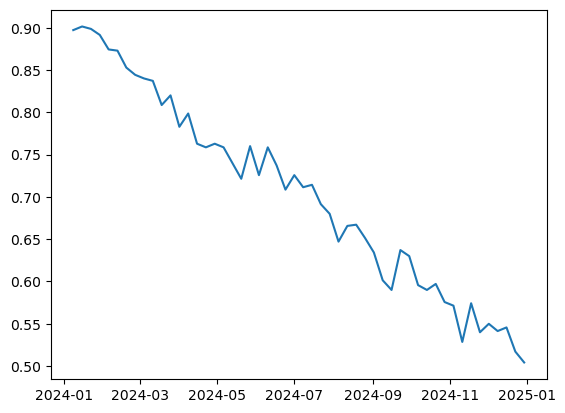

In [10]:
plt.plot(log['Accuracy'].keys(), log['Accuracy'].values())